# Assignment 3

Given a bank customer, build a neural network-based classifier that can determine whether
they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle.
The dataset contains 10,000 sample points with 14 distinct features such as
CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

Link to the Kaggle project:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Perform following steps:

1. Read the dataset.
2. Distinguish the feature and target set and divide the data set into training and test sets.
3. Normalize the train and test data.
4. Initialize and build the model. Identify the points of improvement and implement the same.
5. Print the accuracy score and confusion matrix 

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('3-Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [6]:
# Convert the categorical variables to numerical values
label_encoder = LabelEncoder()

# Apply Label Encoding on 'Gender' and 'Geography'
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Female=0, Male=1
df['Geography'] = label_encoder.fit_transform(df['Geography'])  # France=0, Germany=1, Spain=2

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [8]:
# Separate the features and the target variables
X = df.drop('Exited', axis = 1) # Features
Y = df['Exited'] # Target

In [9]:
# Split the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [10]:
# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# we use only transform on xtest as it uses the same mean and SD learned from the training set

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
model = Sequential()

# First hidden layer with 32 neurons can capture many low-level features.
model.add(Dense(activation='relu', units=32, input_dim=X_train.shape[1]))  # Input layer with more neurons

# The dropout layer helps mitigate overfitting or temporarily deactivating 
# a random subset of neurons during each forward pass in training, 
# forcing the model to learn more robust features.
model.add(Dropout(0.5))  

# ReLU (Rectified Linear Unit) activation function
# Formula: f(x) = max(0,x)

# The second hidden layer with 16 neurons refines the prev. captured features 
# and captures higher-level abstractions.
model.add(Dense(activation='relu', units=16))  # Second hidden layer
model.add(Dense(activation='sigmoid', units=1))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# During training, the cross-entropy loss function exponentially increases the penalty for wrong outputs 
# to drive the weights and biases more aggressively in the right direction.


d:\Coding-practice\Utils\env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7516 - loss: 0.5555
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7965 - loss: 0.4737
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7986 - loss: 0.4533
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8060 - loss: 0.4334
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8213 - loss: 0.4222
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8253 - loss: 0.4144
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.4107
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8266 - loss: 0.4000
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8375 - loss: 0.3832
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8309 - loss: 0.3977
Epoch 11/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8320 - loss: 0.3946
Epoch 12/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [17]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # to convert the probabilistic values to True or False
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]], shape=(2000, 1))

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy Score:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy Score: 0.8705
Confusion Matrix:
 [[1577   24]
 [ 235  164]]


<Axes: >

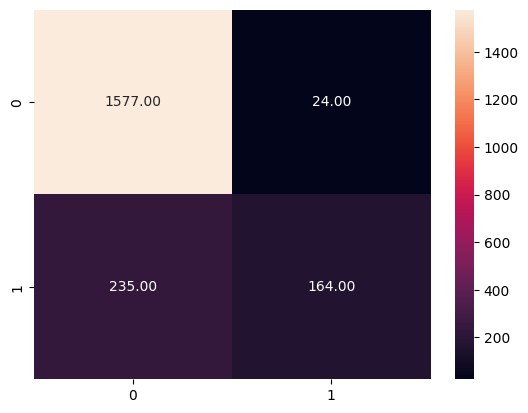

In [22]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='0.2f')